importing libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the first Dataset

In [16]:
video = pd.read_csv("videos-stats.csv")

Data Exploration

In [17]:
video.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [18]:
video.shape

(1881, 8)

Checking for missing values

In [19]:
video.isnull().sum()

Unnamed: 0      0
Title           0
Video ID        0
Published At    0
Keyword         0
Likes           2
Comments        2
Views           2
dtype: int64

Checking the data types

In [20]:
video.dtypes

Unnamed: 0        int64
Title            object
Video ID         object
Published At     object
Keyword          object
Likes           float64
Comments        float64
Views           float64
dtype: object

In [21]:
#change published at data type to date and time
video['Published At'] = pd.to_datetime(video['Published At'])

In [22]:
video.describe()

,Unnamed: 0,Likes,Comments,Views
count,1881.000000,1.879000e+03,1879.000000,1.879000e+03
mean,940.000000,1.700610e+05,7863.331559,1.161292e+07
std,543.142247,7.962293e+05,37879.964926,1.084450e+08
min,0.000000,-1.000000e+00,-1.000000,2.500000e+01
25%,470.000000,2.672500e+03,199.000000,8.451500e+04
50%,940.000000,1.478700e+04,814.000000,5.917210e+05
75%,1410.000000,6.090600e+04,3377.500000,2.804978e+06
max,1880.000000,1.644556e+07,732818.000000,4.034122e+09


In [23]:
video.describe(include="object")

,Title,Video ID,Keyword
count,1881,1881,1881
unique,1854,1869,41
top,What is Machine Learning?,5q87K1WaoFI,machine learning
freq,4,2,50


In [24]:
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    1881 non-null   int64         
 1   Title         1881 non-null   object        
 2   Video ID      1881 non-null   object        
 3   Published At  1881 non-null   datetime64[ns]
 4   Keyword       1881 non-null   object        
 5   Likes         1879 non-null   float64       
 6   Comments      1879 non-null   float64       
 7   Views         1879 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 117.7+ KB


In [25]:
#dropping unnamed column
video.drop(['Unnamed: 0'],axis= 1, inplace = True)


loading the second dataset

In [26]:
com = pd.read_csv("comments.csv")

exploration of data

In [27]:
com.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [28]:
com.shape

(18409, 5)

In [29]:
com.isnull().sum()

Unnamed: 0    0
Video ID      0
Comment       1
Likes         0
Sentiment     0
dtype: int64

In [30]:
com.dtypes

Unnamed: 0      int64
Video ID       object
Comment        object
Likes         float64
Sentiment     float64
dtype: object

In [31]:
com.describe()

,Unnamed: 0,Likes,Sentiment
count,18409.000000,18409.000000,18409.000000
mean,9204.000000,1040.019447,1.493998
std,5314.364888,10651.366148,0.709928
min,0.000000,0.000000,0.000000
25%,4602.000000,5.000000,1.000000
50%,9204.000000,29.000000,2.000000
75%,13806.000000,190.000000,2.000000
max,18408.000000,891372.000000,2.000000


In [32]:
com.describe(include= 'object')

,Video ID,Comment
count,18409,18408
unique,1869,17994
top,2FYvHn12pOQ,One of the best thing about Dude is that he\r\...
freq,20,10


In [33]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18409 non-null  int64  
 1   Video ID    18409 non-null  object 
 2   Comment     18408 non-null  object 
 3   Likes       18409 non-null  float64
 4   Sentiment   18409 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 719.2+ KB


In [34]:
#dropping unnamed column
com.drop(['Unnamed: 0'],axis= 1, inplace = True)

merging the two datasets

In [35]:
df = pd.merge(video,com,on="Video ID")

In [36]:
df

,Title,Video ID,Published At,Keyword,Likes_x,Comments,Views,Comment,Likes_y,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0
...,...,...,...,...,...,...,...,...,...,...
18640,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN,I really like the point about engineering tool...,0.0,2.0
18641,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN,I’ve just started exploring this field. And th...,20.0,2.0
18642,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN,Excelente video con una pregunta filosófica pr...,1.0,1.0
18643,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN,"Hey Daniel, just discovered your channel a cou...",35.0,2.0


In [37]:
df.shape

(18645, 10)

In [38]:
df.columns

Index(['Title', 'Video ID', 'Published At', 'Keyword', 'Likes_x', 'Comments',
       'Views', 'Comment', 'Likes_y', 'Sentiment'],
      dtype='object')

In [39]:
# rename likes_x , Likes_y column names
df.rename(columns={'Likes_x' :'video_likes' ,'Likes_y':'comment_likes'},inplace =True)

In [40]:
df.isnull().sum()

Title             0
Video ID          0
Published At      0
Keyword           0
video_likes      20
Comments         20
Views            20
Comment           1
comment_likes     0
Sentiment         0
dtype: int64

In [41]:
df = df.dropna(axis = 0)

In [42]:
df.dtypes

Title                    object
Video ID                 object
Published At     datetime64[ns]
Keyword                  object
video_likes             float64
Comments                float64
Views                   float64
Comment                  object
comment_likes           float64
Sentiment               float64
dtype: object

In [43]:
# convert likes, comments and views datatype to integer
df = df.astype({"video_likes":"int","Comments":"int","Views":"int",'comment_likes':'int','Sentiment':'int'})

In [44]:
df.describe()

,video_likes,Comments,Views,comment_likes,Sentiment
count,1.862400e+04,18624.000000,1.862400e+04,18624.000000,18624.000000
mean,1.753445e+05,8101.779800,1.174143e+07,1045.991463,1.495382
std,8.047223e+05,38184.962115,1.088900e+08,10613.607800,0.708931
min,-1.000000e+00,-1.000000,2.500000e+01,0.000000,0.000000
25%,2.786000e+03,216.750000,9.284100e+04,4.000000,1.000000
50%,1.542500e+04,864.000000,6.173500e+05,29.000000,2.000000
75%,6.210300e+04,3501.000000,2.861258e+06,191.000000,2.000000
max,1.644556e+07,732818.000000,4.034122e+09,891372.000000,2.000000


In [45]:
df.describe(include = object)

,Title,Video ID,Keyword,Comment
count,18624,18624,18624,18624
unique,1853,1867,41,17974
top,20 Minecraft Block Facts You Maybe Didn&#39;t ...,ZgeorpjGJC0,reaction,One of the best thing about Dude is that he\r\...
freq,40,40,519,20


In [46]:
df.head()

,Title,Video ID,Published At,Keyword,video_likes,Comments,Views,Comment,comment_likes,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Let's not forget that Apple Pay in 2014 requir...,95,1
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Here in NZ 50% of retailers don’t even have co...,19,0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,I will forever acknowledge this channel with t...,161,2
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,Whenever I go to a place that doesn’t take App...,8,0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407,672,135612,"Apple Pay is so convenient, secure, and easy t...",34,2


Uni- variate analysis

In [47]:
df['Title'].value_counts().nlargest(25)


20 Minecraft Block Facts You Maybe Didn&#39;t Know                                                         40
BLACKPINK - ‘Pink Venom’ DANCE PRACTICE VIDEO                                                              40
Python Machine Learning Tutorial (Data Science)                                                            40
Lofi For Reading 📚 Lofi Hip Hop | Study Music 📚 Study Beats | Lofi Study Music                             40
How to Solve a Rubik&#39;s Cube | WIRED                                                                    40
🚨 DÉPÊCHEZ-VOUS 🚨 Ces PROMOS disparaissent bientôt du PS Store, Xbox Store, Nintendo eShop...              40
Computer Scientist Explains Machine Learning in 5 Levels of Difficulty | WIRED                             40
Vikram Vedha Movie Teaser Review | KRK | #krkreview #bollywood #latestreviews #review #hrithik             40
The History Of Chess: A Reflection Of Us                                                                   40
ASMR Gamin

In [48]:
df['age of video'] = pd.to_datetime('today') - df['Published At']
df['age of video'] = df['age of video'].dt.floor('D')

In [49]:
df["age of video"].describe()

count                          18624
mean     751 days 01:14:46.082474224
std      811 days 03:14:17.239570192
min                304 days 00:00:00
25%                306 days 00:00:00
50%                377 days 00:00:00
75%                868 days 00:00:00
max               5822 days 00:00:00
Name: age of video, dtype: object

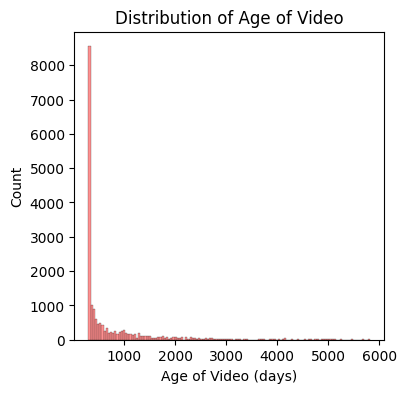

In [50]:
custom_palette = ["#FF6B6B"]
plt.figure(figsize=(4, 4))
sns.histplot(df['age of video'].dt.days, color=custom_palette[0])
plt.xlabel('Age of Video (days)')
plt.ylabel('Count')
plt.title('Distribution of Age of Video')
plt.show()








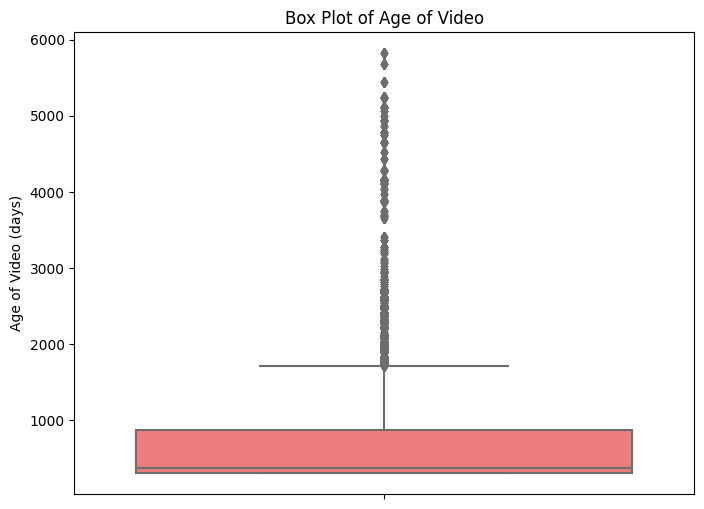

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['age of video'].dt.days, color='#FF6B6B')
plt.ylabel('Age of Video (days)')
plt.title('Box Plot of Age of Video')
plt.show()








In [52]:


sorted_df = df.sort_values(by='age of video',ascending = False)


oldest_video = sorted_df.drop_duplicates(subset='Title', keep='first')

oldest_video

,Title,Video ID,Published At,Keyword,video_likes,Comments,Views,Comment,comment_likes,Sentiment,age of video
7369,J. Holiday - Bed (Official Music Video),82t_UOMHPJY,2007-07-16,bed,515049,16568,78137822,Who still here in 2022!? Rhythm and Blues = Lo...,358,2,5822 days
7441,J Holiday - Bed,uAwPjFq1W4s,2007-12-11,bed,119272,3743,26826274,i used to sing this song all the time when i w...,78,1,5674 days
11561,Pink Floyd - We Don&#39;t Need No Education Ly...,MAe_w9a_IN8,2008-07-25,education,50074,3095,7178954,"2020 - thank you God for this beautiful year, ...",25,2,5447 days
14175,Biology: Digestive System Video,bo2Ape8JHqA,2009-02-16,biology,132214,5981,17716356,"This is just amazing and very helpful, thank you!",19,2,5241 days
4518,Ice Cube - It Was A Good Day,h4UqMyldS7Q,2009-02-24,cubes,2307773,71897,168546247,The idea of a song about having a plain old go...,402,2,5233 days
...,...,...,...,...,...,...,...,...,...,...,...
10422,Wonderland Indonesia 2 : The Sacred Nusantara ...,l-TO8g3_arc,2022-08-24,reaction,2175,115,35288,Please react to another Alffy Rev MV :\n1. The...,19,2,304 days
15671,LA FECHA DEFINITIVA del NINTENDO DIRECT con ZE...,6i0BA-cDnrU,2022-08-24,nintendo,814,85,12274,¿Qué fecha estimas para el Nintendo Direct de ...,12,1,304 days
10417,"Vikram Vedha Teaser | Hrithik Roshan, Saif Ali...",erCx9kkDO-k,2022-08-24,reaction,6117,745,126185,"Hrithik is a terrific actor , \nu can't deny 🔥",121,2,304 days
10447,LUFFY FORMS 5600 PIRATE ALLIANCE! One Piece Ep...,aIP3UEg5xoQ,2022-08-24,reaction,2342,226,34789,4:13 while Jerry can be annoying sometimes I a...,14,1,304 days


In [53]:
top_keywords =df['Keyword'].value_counts().nlargest(5)

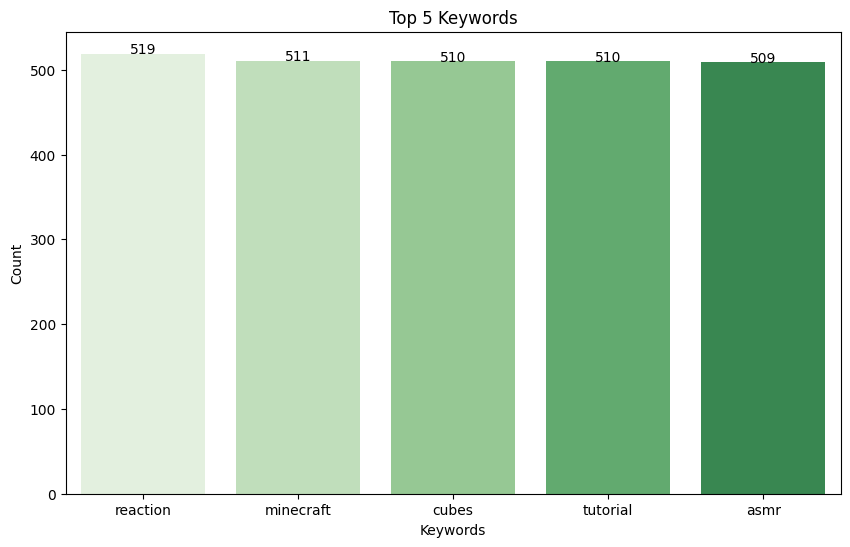

In [54]:
sns.set_palette('Greens')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_keywords.index, y=top_keywords.values)
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.title('Top 5 Keywords')
for i, count in enumerate(top_keywords.values):
    ax.text(i, count + 0.2, str(count), ha='center')
plt.show()


In [55]:
unique_videos = df['Title'].drop_duplicates()

top_5_videos = df[df['Title'].isin(unique_videos)].groupby('Title')['video_likes'].max().reset_index()
sorted_videos = top_5_videos.sort_values(by='video_likes', ascending=False)

top_5_with_likes = sorted_videos.head(5)

print(top_5_with_likes)

                                                  Title  video_likes
535   El Chombo - Dame Tu Cosita feat. Cutty Ranks (...     16445558
5                     $456,000 Squid Game In Real Life!     14259033
1026           Martin Garrix - Animals (Official Video)     11025176
1237  Powfu - death bed (coffee for your head) (Offi...      7786057
1521  The Weeknd - Save Your Tears (Official Music V...      6823113


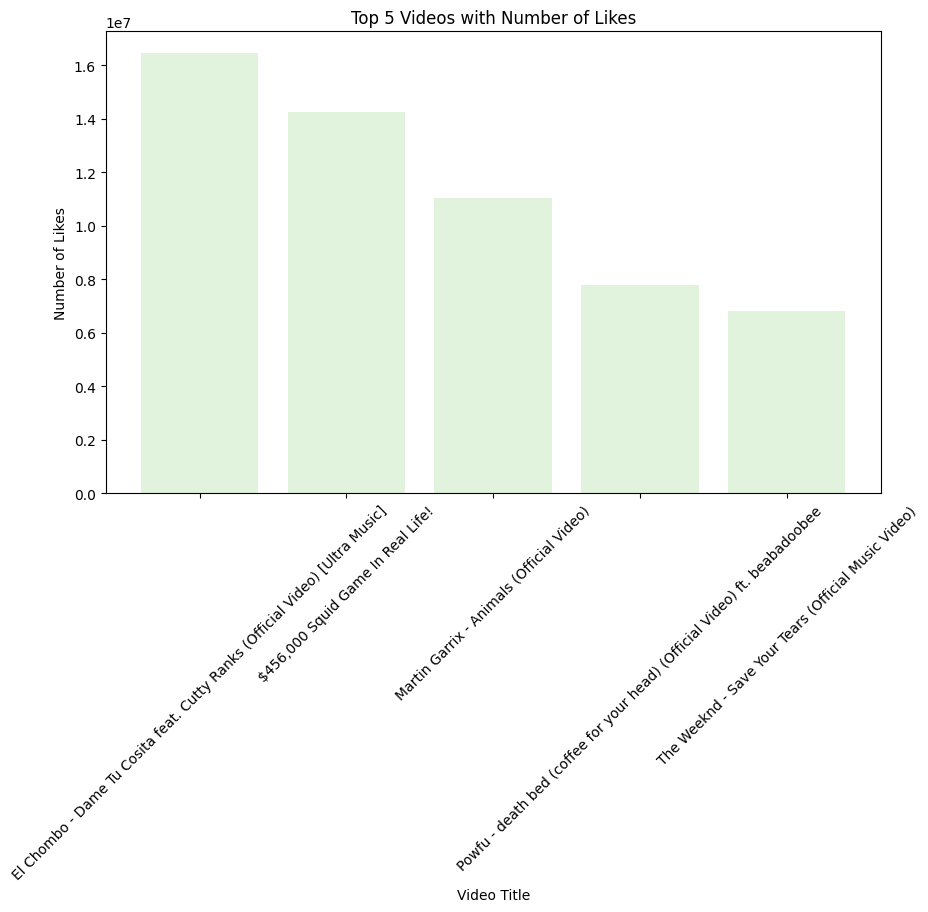

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_with_likes['Title'], top_5_with_likes['video_likes'])
plt.xlabel('Video Title')
plt.ylabel('Number of Likes')
plt.title('Top 5 Videos with Number of Likes')
plt.xticks(rotation=45)
plt.show()

In [57]:
unique_videos = df['Title'].drop_duplicates()
top_5_views = df[df['Title'].isin(unique_videos)].groupby('Title')['Views'].max().reset_index()
sorted_views = top_5_views.sort_values(by='Views', ascending=False)
top_5_views = sorted_views.head(5)
print(top_5_views)


                                                  Title       Views
535   El Chombo - Dame Tu Cosita feat. Cutty Ranks (...  4034122271
1026           Martin Garrix - Animals (Official Video)  1582262997
1521  The Weeknd - Save Your Tears (Official Music V...   915457091
1025          Maroon 5 - Animals (Official Music Video)   826423766
1237  Powfu - death bed (coffee for your head) (Offi...   524709805


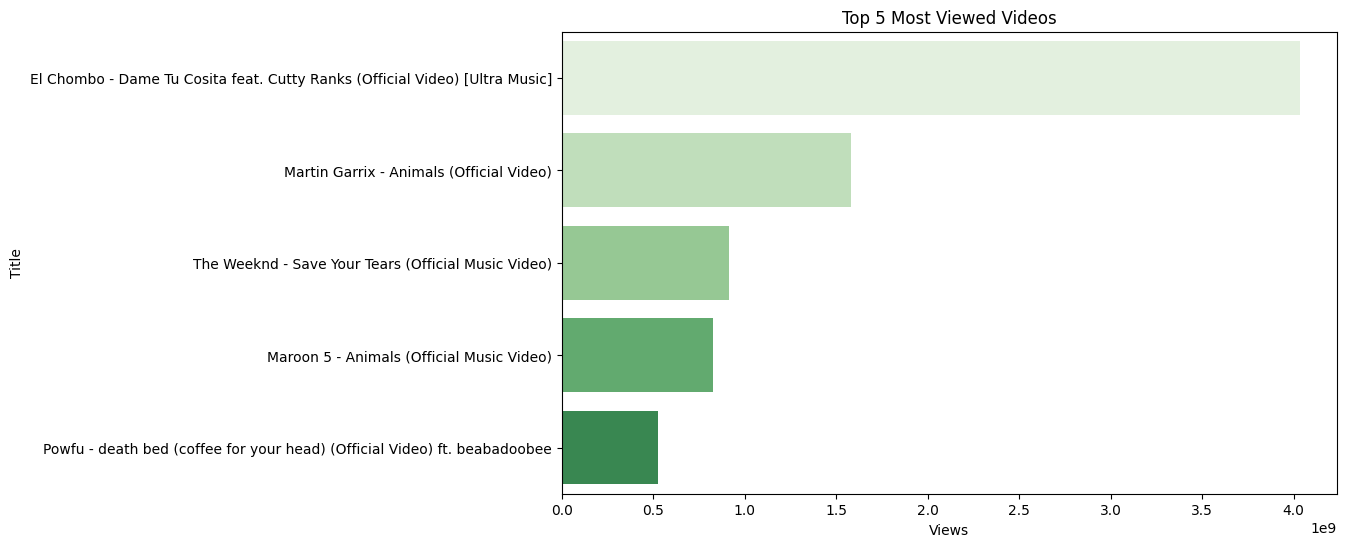

In [58]:
sns.set_palette('Greens')


plt.figure(figsize=(10, 6))
sns.barplot(x='Views', y='Title', data=top_5_views)
plt.xlabel('Views')
plt.ylabel('Title')
plt.title('Top 5 Most Viewed Videos')
plt.show()









In [59]:
max_likes_index = df['comment_likes'].idxmax()


most_liked_comment = df.loc[max_likes_index, ['Title', 'Comment', 'comment_likes']]

print(most_liked_comment)

Title                            $456,000 Squid Game In Real Life!
Comment          Like I said in the video, subscribe if you hav...
comment_likes                                               891372
Name: 12718, dtype: object


In [60]:


sorted_df = df.sort_values(by='comment_likes', ascending=False)


top_5_comments = sorted_df.head(5)

data = pd.DataFrame(top_5_comments[['Title', 'Comment', 'comment_likes']])
data


,Title,Comment,comment_likes
12718,"$456,000 Squid Game In Real Life!","Like I said in the video, subscribe if you hav...",891372
12719,"$456,000 Squid Game In Real Life!","Huge props to the set designers, everything wa...",469175
12724,"$456,000 Squid Game In Real Life!","This is insanity, never done before in the his...",378181
12778,I Spent 50 Hours Buried Alive,"Like I said in the video, subscribe if you hav...",268266
12818,24 Hours In The Most Haunted Place On Earth,Subscribe and i'll give you a car,260871


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


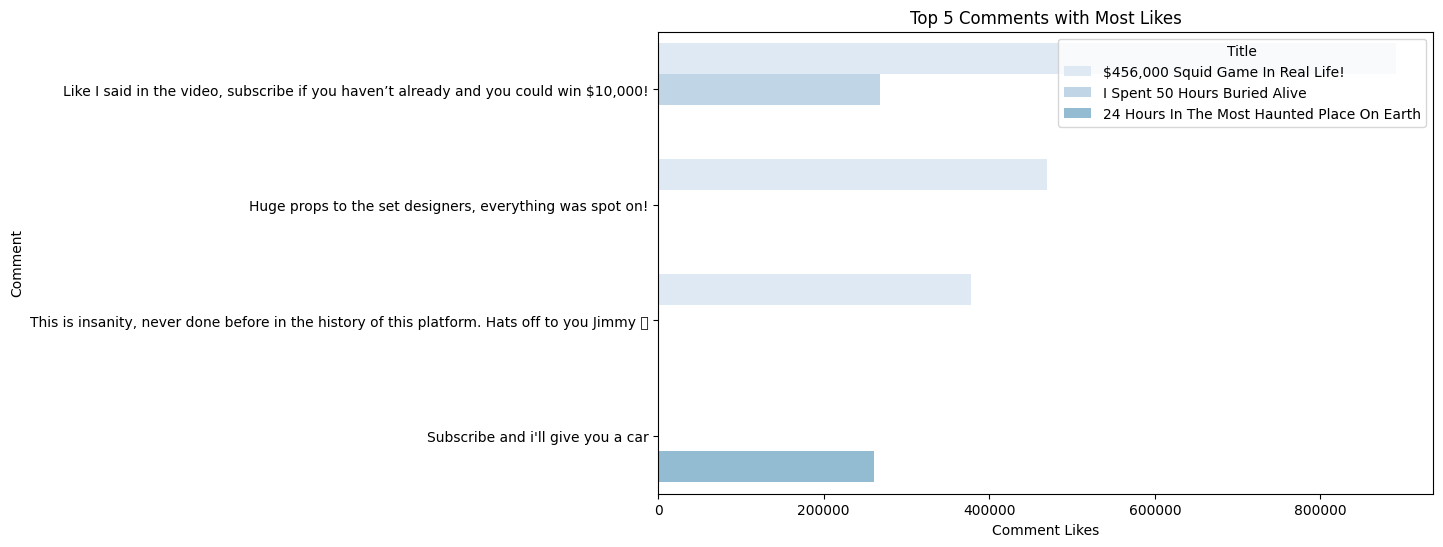

In [61]:



sns.set_palette('Blues')


plt.figure(figsize=(10, 6))
sns.barplot(x='comment_likes', y='Comment', data=top_5_comments, hue='Title')
plt.xlabel('Comment Likes')
plt.ylabel('Comment')
plt.title('Top 5 Comments with Most Likes')
plt.legend(title='Title')
plt.show()


In [62]:
df.columns

Index(['Title', 'Video ID', 'Published At', 'Keyword', 'video_likes',
       'Comments', 'Views', 'Comment', 'comment_likes', 'Sentiment',
       'age of video'],
      dtype='object')

In [63]:
df.Sentiment.value_counts()

2    11578
1     4694
0     2352
Name: Sentiment, dtype: int64

In [64]:
sentiment_counts = df['Sentiment'].value_counts()

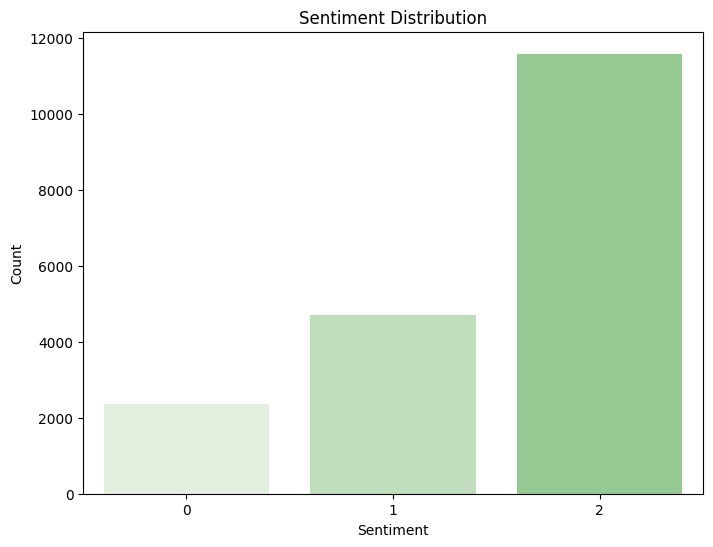

In [65]:
sns.set_palette('Greens')


plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')



plt.show()

bi variate analysis

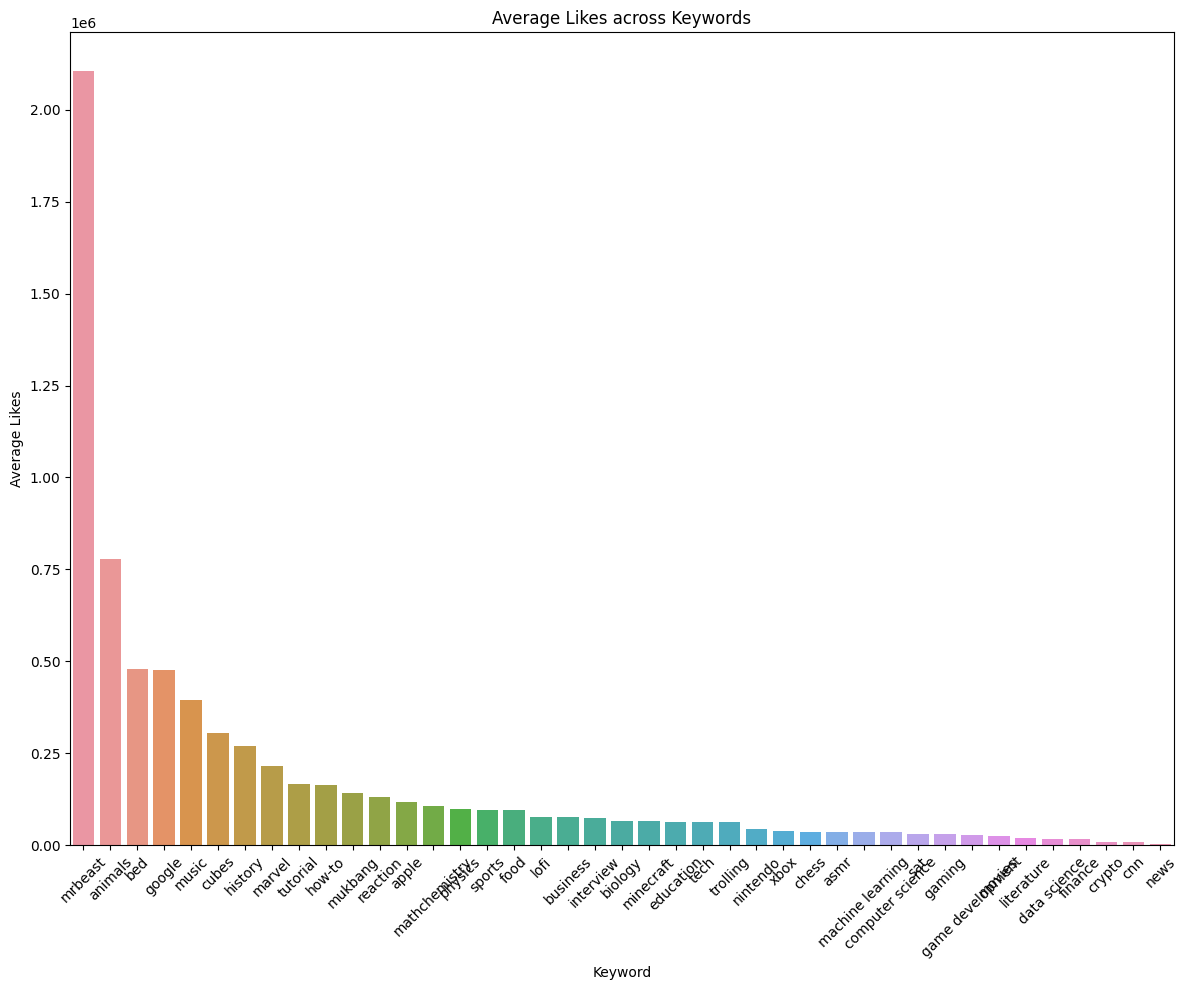

In [66]:
sns.set_palette('Greens')

# Calculate the average Likes for each Keyword
average_likes = df.groupby('Keyword')['video_likes'].mean().reset_index()
average_likes = average_likes.sort_values('video_likes', ascending=False)

# Create a bar plot of average Likes across different Keywords
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.barplot(x='Keyword', y='video_likes', data=average_likes)
plt.xlabel('Keyword')
plt.ylabel('Average Likes')
plt.title('Average Likes across Keywords')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()







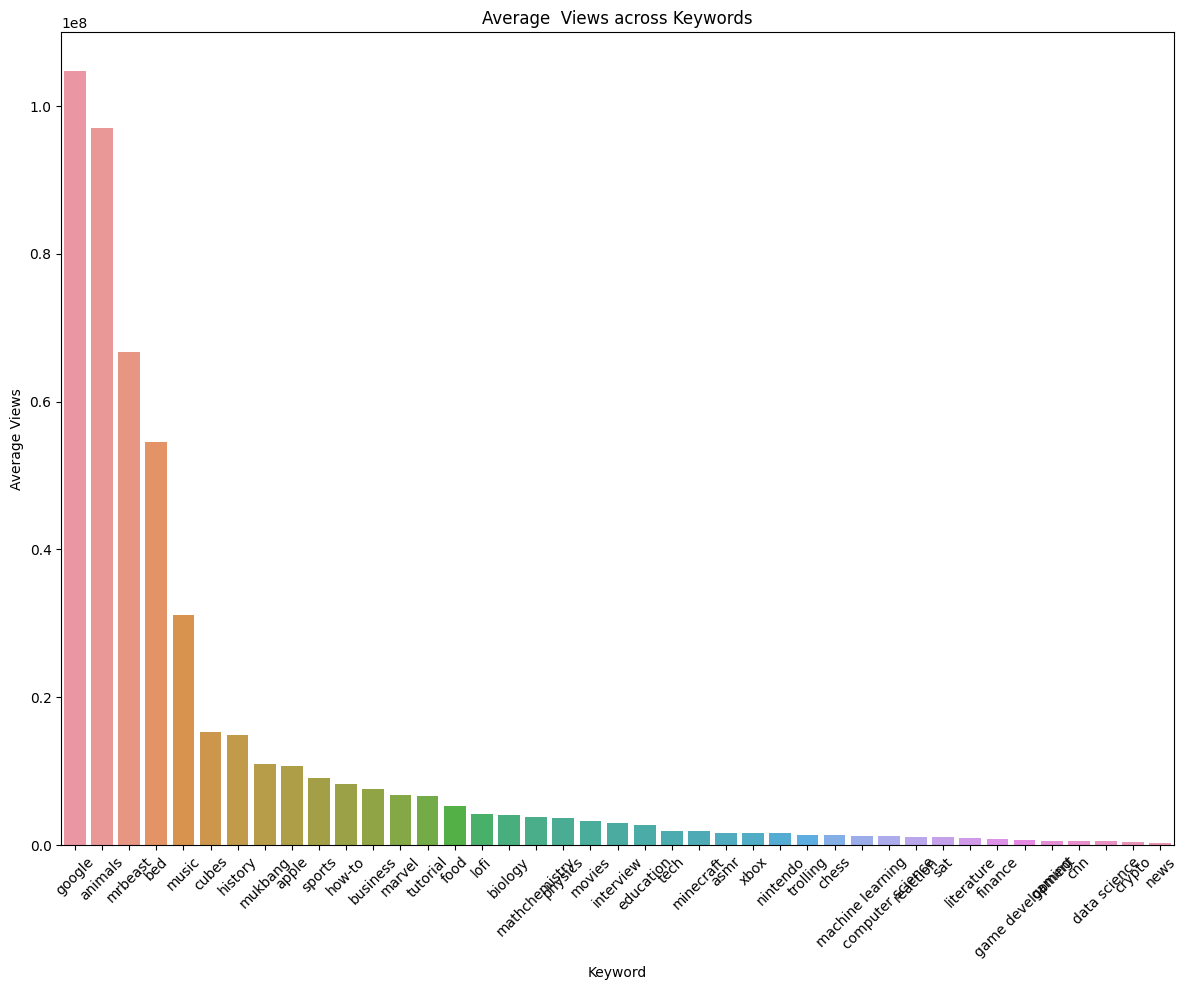

In [67]:
sns.set_palette('Greens')

# Calculate the average Likes for each Keyword
average_views = df.groupby('Keyword')['Views'].mean().reset_index()
average_views = average_views.sort_values('Views', ascending=False)

# Create a bar plot of average Likes across different Keywords
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.barplot(x='Keyword', y='Views', data=average_views)
plt.xlabel('Keyword')
plt.ylabel('Average Views')
plt.title('Average  Views across Keywords')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

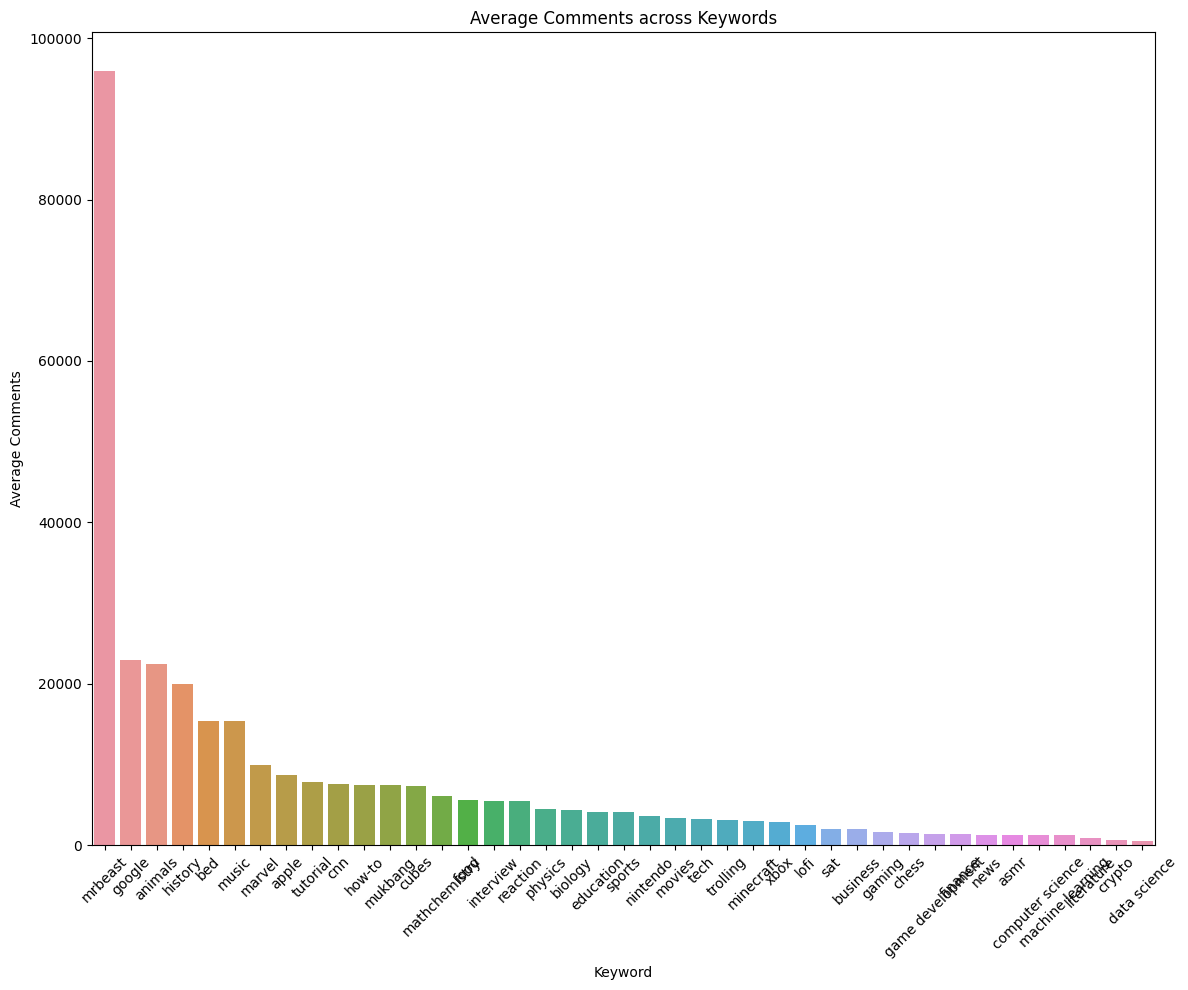

In [68]:
sns.set_palette('Greens')

# Calculate the average Likes for each Keyword
average_comments = df.groupby('Keyword')['Comments'].mean().reset_index()
average_comments = average_comments.sort_values('Comments', ascending=False)

# Create a bar plot of average Likes across different Keywords
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.barplot(x='Keyword', y='Comments', data=average_comments)
plt.xlabel('Keyword')
plt.ylabel('Average Comments')
plt.title('Average Comments across Keywords')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-69-bb81bc81bf8d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


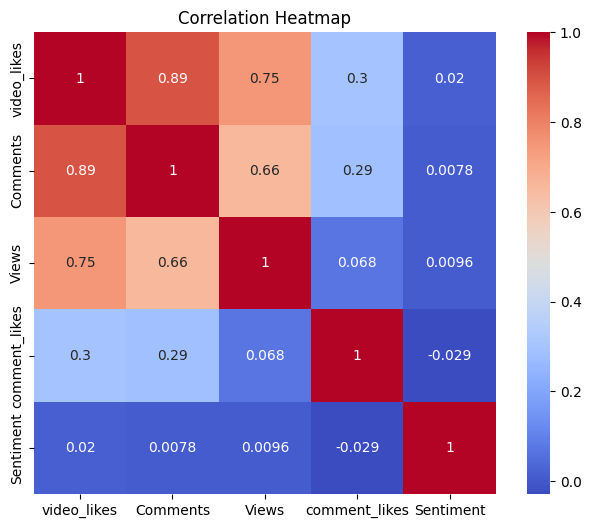

In [69]:
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()







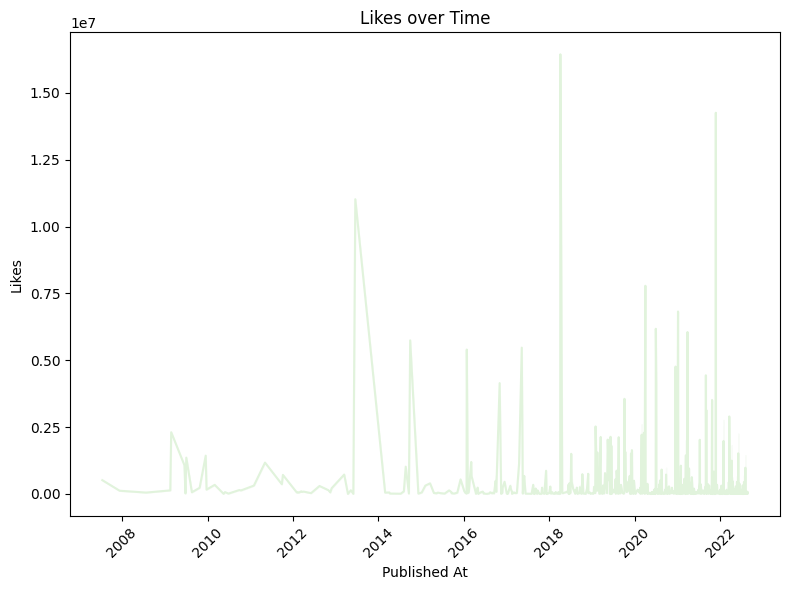

In [70]:
# Create a line plot of Likes over time
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.lineplot(x='Published At', y='video_likes', data=df)
plt.xlabel('Published At')
plt.ylabel('Likes')
plt.title('Likes over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust spacing between the plot elements
plt.show()

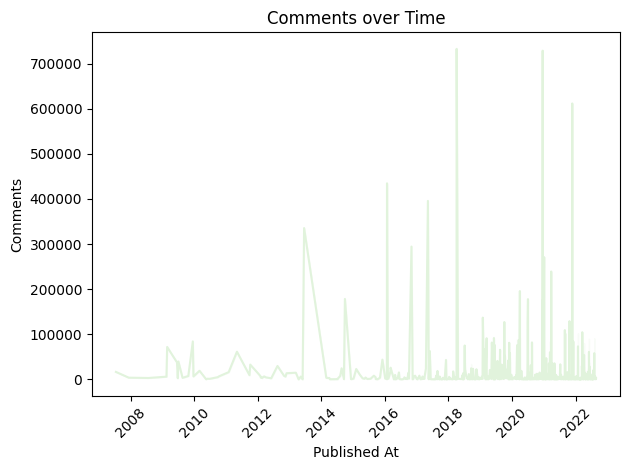

In [71]:

sns.lineplot(x='Published At', y='Comments', data=df)
plt.xlabel('Published At')
plt.ylabel('Comments')
plt.title('Comments over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



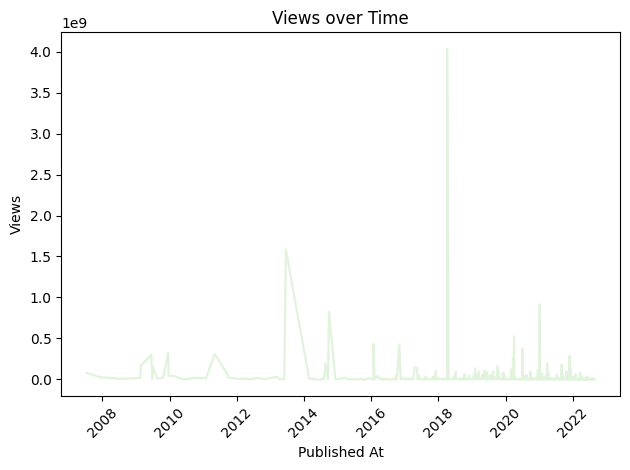

In [72]:

sns.lineplot(x='Published At', y='Views', data=df)
plt.xlabel('Published At')
plt.ylabel('Views')
plt.title('Views over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
df['Comment'][1]

'Here in NZ 50% of retailers don’t even have contactless credit card machines like pay-wave which support Apple Pay. They don’t like the high fees that come with these.'

comment column

In [75]:
# Replacing punctuations with space
df['Comment'] = df['Comment'].str.replace("[^a-zA-Z0-9]", " ")

<ipython-input-75-348db0247c04>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Comment'] = df['Comment'].str.replace("[^a-zA-Z0-9]", " ")


In [76]:
# make entire text lowercase
df['Comment']= [row.lower() for row in df['Comment']]

In [77]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [78]:
def remove_stopwords(rev):

    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new


df['Comment'] = [remove_stopwords(r) for r in df['Comment']]

In [80]:
# Tokenize comments into individual words
df['Comment'] = df['Comment'].apply(word_tokenize)


In [81]:


# Lemmatization
# Begin Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
df['Comment'] = df['Comment'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [82]:
df['Comment'] = df['Comment'].apply(' '.join)

word cloud

In [83]:
from wordcloud import WordCloud


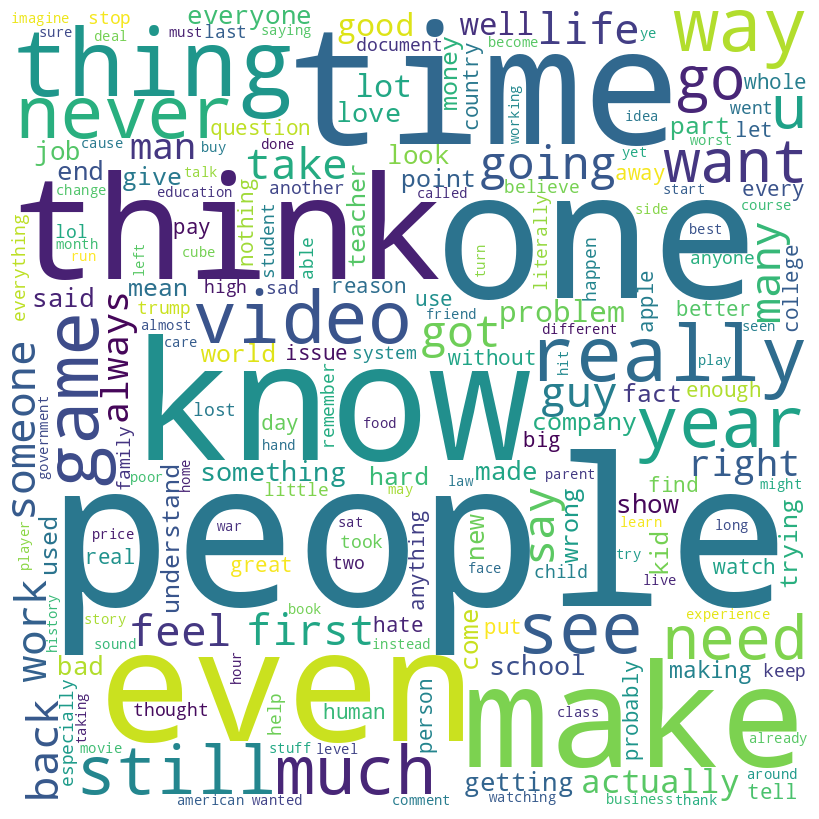

In [ ]:
#for negative comments
word_cloud_df = df.loc[df['Sentiment'] == 0,:]
all_words = ' '.join([text for text in word_cloud_df['Comment']])


wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

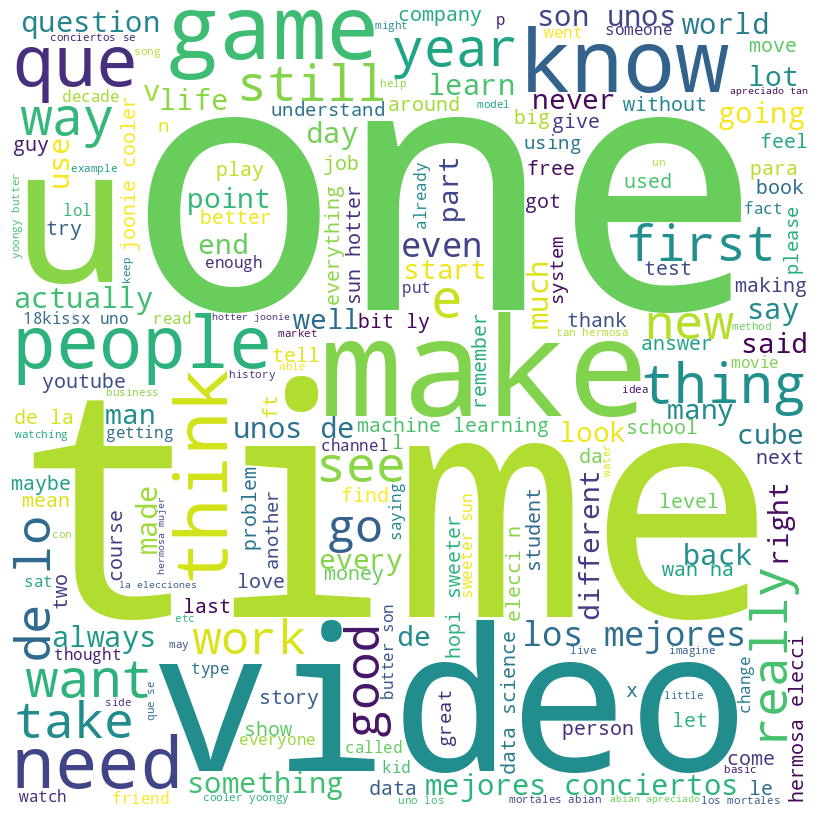

In [84]:
#for neutral comments
word_cloud_df = df.loc[df['Sentiment'] == 1,:]
all_words = ' '.join([text for text in word_cloud_df['Comment']])


wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

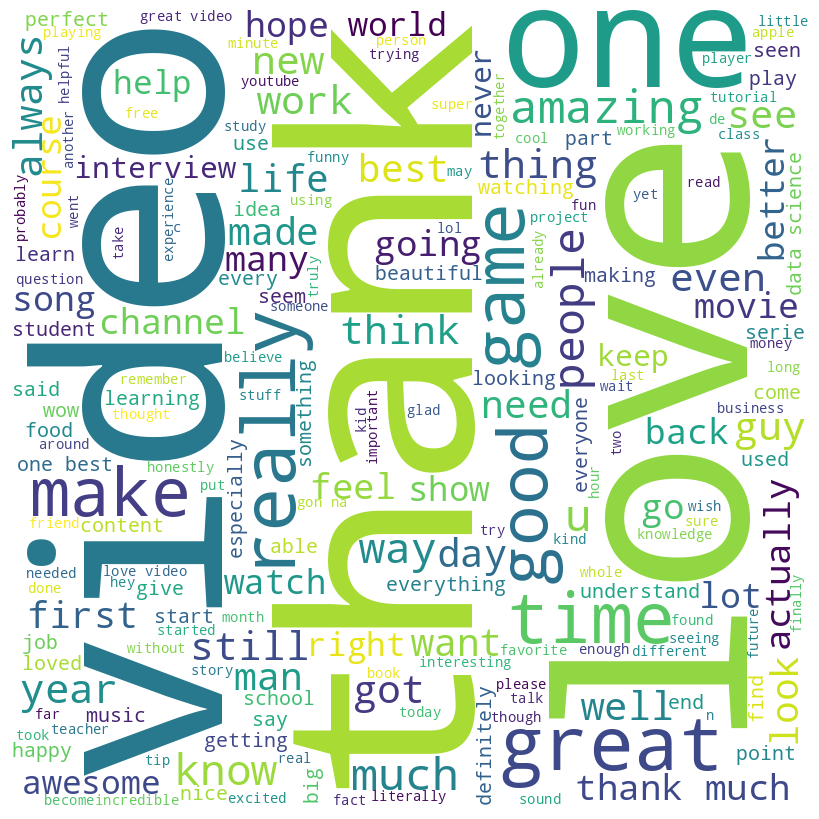

In [85]:
#for positive comments
word_cloud_df = df.loc[df['Sentiment'] == 2,:]
all_words = ' '.join([text for text in word_cloud_df['Comment']])


wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

bag of words model

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Creating matrix of top 2500 tokens
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(df.Comment).toarray()
feature_names = tfidf.get_feature_names_out()



# Creating DataFrame from TF-IDF matrix
df_tfidf = pd.DataFrame(X, columns=feature_names)
print(df_tfidf.head())


    00  000   01   02   03   04   05   06   07   08  ...  young  younger  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0      0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0      0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0      0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0      0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0      0.0   

   youtu  youtube  youtuber  youtubers   yr  yummy  zero  zoom  
0    0.0      0.0       0.0        0.0  0.0    0.0   0.0   0.0  
1    0.0      0.0       0.0        0.0  0.0    0.0   0.0   0.0  
2    0.0      0.0       0.0        0.0  0.0    0.0   0.0   0.0  
3    0.0      0.0       0.0        0.0  0.0    0.0   0.0   0.0  
4    0.0      0.0       0.0        0.0  0.0    0.0   0.0   0.0  

[5 rows x 2500 columns]


In [90]:
#storing features in a variable
xdf = df[[ 'Comments','comment_likes', 'Sentiment'
       ]]

In [91]:

#merging bag of words features and all other features
merged_df = pd.merge(xdf, df_tfidf, left_index=True, right_index=True)

print(merged_df)


       Comments  comment_likes  Sentiment   00  000   01   02   03   04   05  \
0           672             95          1  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1           672             19          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2           672            161          2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3           672              8          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4           672             34          2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...            ...        ...  ...  ...  ...  ...  ...  ...  ...   
18619       443            119          2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
18620       443             21          2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
18621       443            159          2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
18622       443             66          2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
18623       443             26          2  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       ...  young  younger  youtu  yout

Assigning features and target variable in variables

In [92]:
 X = merged_df.values#features
 y = df["video_likes"].values[:-1] #target variable


(18623, 2503)

Splitting the data

In [94]:
# # # Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=777)

Scaling the data

In [95]:
from sklearn.preprocessing import StandardScaler ## standrard scalig
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test = scaler.transform(X_test) # transform the test data

linear regression


In [96]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [97]:
y_pred = regressor.predict(X_test)

In [98]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -5.345757638039121e+23


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
from sklearn.model_selection import cross_val_score
for depth in [1,2,3,4,5,6,7,8,9,10,20]:

  dt = DecisionTreeRegressor(max_depth=depth)
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10)
  print("Depth  : ", depth,  " Cross val score : " ,np.mean(valAccuracy))

  #this to find the ideal value for the hyper parameter max_depth , the i value with highest cross val score will the the ideal value

Depth  :  1  Cross val score :  0.6161200732150244
Depth  :  2  Cross val score :  0.7486160665710606
Depth  :  3  Cross val score :  0.8599694867291543
Depth  :  4  Cross val score :  0.875422960854842
Depth  :  5  Cross val score :  0.8948445371258019
Depth  :  6  Cross val score :  0.8918145489073025
Depth  :  7  Cross val score :  0.8897074724383767
Depth  :  8  Cross val score :  0.9003642816225931
Depth  :  9  Cross val score :  0.90286637963286
Depth  :  10  Cross val score :  0.9042582761922091
Depth  :  20  Cross val score :  0.8983915026160247


In [118]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)




In [119]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9303185360573291


random forest

In [102]:
from sklearn.ensemble import RandomForestRegressor


In [103]:
rf_regressor = RandomForestRegressor()

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

In [ ]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9241871884648466


xg boost

In [104]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

In [105]:
model = xgb.XGBRegressor(learning_rate = 0.01,n_estimators=100, verbosity = 0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [106]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8161710557445947


knn

In [107]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [112]:

for i in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=i)  # Initializing the model
    knn.fit(X_train, y_train)  # Training the model
    score = np.mean(cross_val_score(knn, X_train, y_train, cv=10))
    print("K value: ", i, " CV score: ", score)


K value:  1  CV score:  0.968882390977063
K value:  2  CV score:  0.9748902690922726
K value:  3  CV score:  0.9756292795928001
K value:  4  CV score:  0.9741860303447103
K value:  5  CV score:  0.9742307494119105
K value:  6  CV score:  0.9652264406045198
K value:  7  CV score:  0.9494128596989986
K value:  8  CV score:  0.9292993977897069
K value:  9  CV score:  0.9085982129710451


In [113]:
knn = KNeighborsRegressor(3) #initialising the model with best k value
knn.fit(X_train,y_train) # training the model
y_pred = knn.predict(X_test)

In [114]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9690577713598233
